In [2]:
# require(xlsx)
library(readxl)

# require for plotting
library(gplots)
library(RColorBrewer)

# read the file: cdhit pattern and ris data
df <- read_excel("../../cdhitResult/cdhitPattern.xlsx")
ris <- read_excel("../../EC_amr_anotateRIS20170710.xlsx")


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



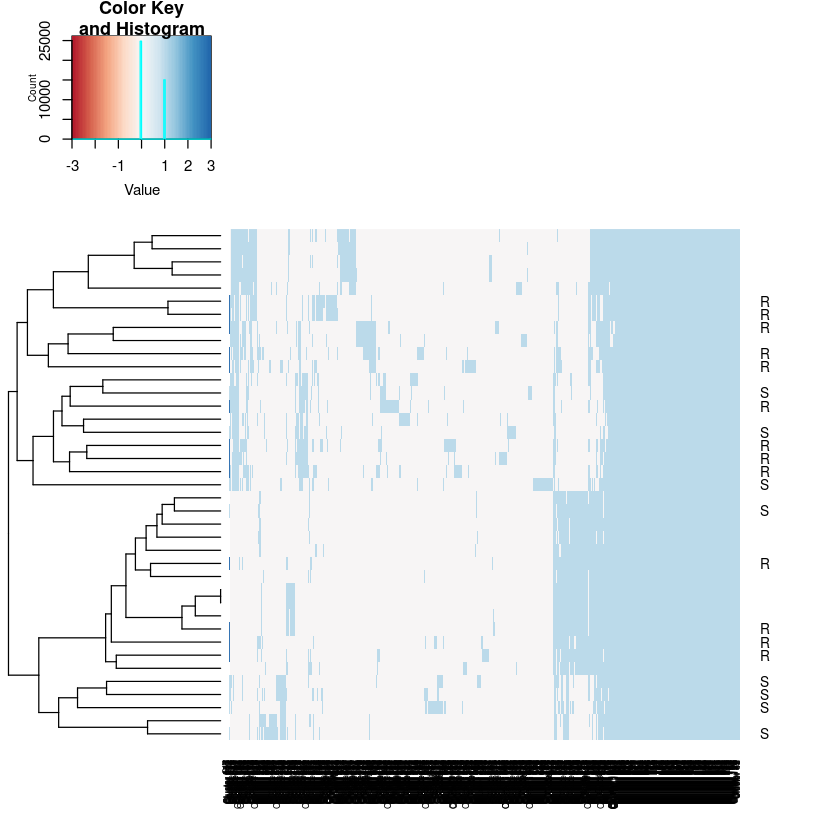

In [3]:
# first try with ampicillin
ampicillin = ris[ris$ANTIBIOTIC == 'ampicillin',] # select ampicillin data
pan <- merge(ampicillin[,c("GENOME_ID", "SIR")], df, by.x = "GENOME_ID", all.x = TRUE, all.y = FALSE) # join two dataframe
pan$SIR <- factor(pan$SIR, levels = c("S", "I", "R")) # tell S<I<R order
sorted <- pan[with(pan, order(SIR)), ] # sort by ampicillin SIR 
pan_matrix = data.matrix(sorted[,2:ncol(pan)]) # need to convert to matrix to plot

# plotting
hmcol = colorRampPalette(brewer.pal(9, "RdBu"))(100)
pan_heatmap <- heatmap.2(pan_matrix, labRow =sorted[,c('SIR')], dendrogram = "row", Rowv = TRUE, Colv = TRUE, scale="none", trace = "none", col = hmcol, breaks = seq(-3, 3, length.out = 101))                                                                                                                   

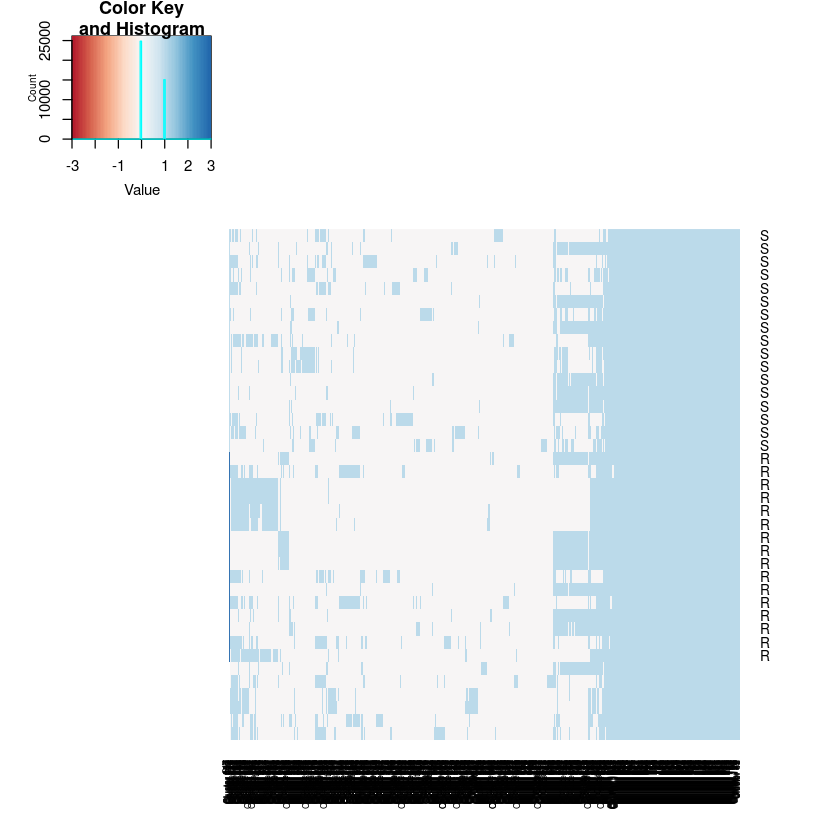

In [82]:
drug = ris[ris$ANTIBIOTIC == 'cefazolin',]
pan <- merge(drug[,c("GENOME_ID", "SIR")], df, by.x = "GENOME_ID", all.x = TRUE, all.y = FALSE)
pan$SIR <- factor(pan$SIR, levels = c("S", "I", "R"))
sorted <- pan[with(pan, order(SIR)), ]
pan_matrix = data.matrix(sorted[,2:ncol(pan)])
hmcol = colorRampPalette(brewer.pal(9, "RdBu"))(100)
pan_heatmap <- heatmap.2(pan_matrix, labRow =sorted[,c('SIR')], dendrogram = "none", Rowv = FALSE, Colv = TRUE, scale="none", trace = "none", col = hmcol, breaks = seq(-3, 3, length.out = 101))

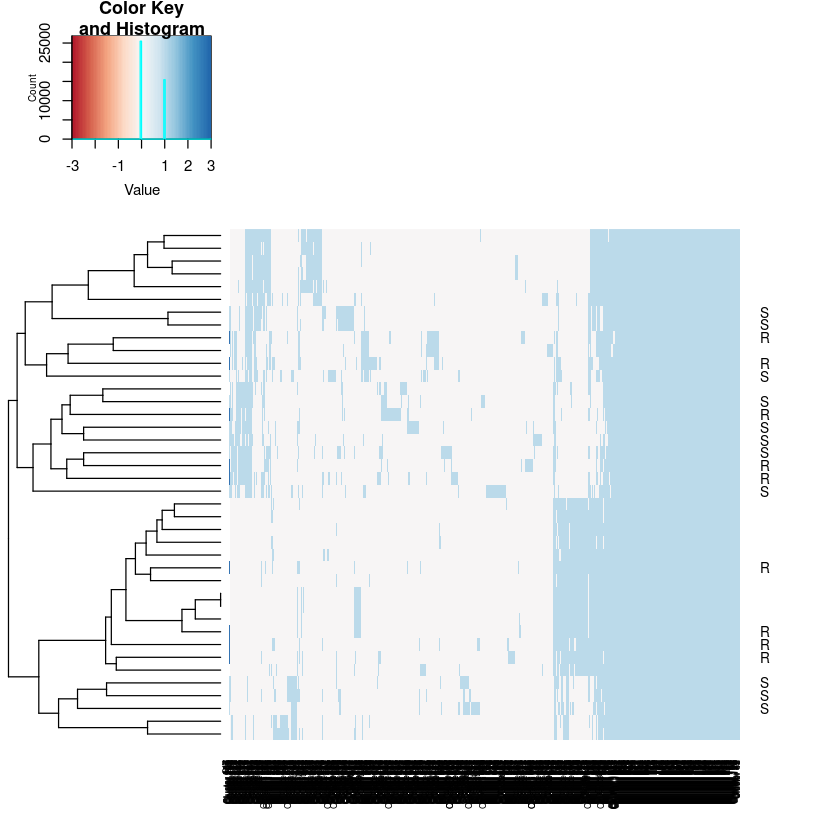

In [129]:
drug = ris[ris$ANTIBIOTIC == 'ciprofloxacin',]
pan <- merge(drug[,c("GENOME_ID", "SIR")], df, by.x = "GENOME_ID", all.x = TRUE, all.y = FALSE)
pan$SIR <- factor(pan$SIR, levels = c("S", "I", "R"))
sorted <- pan[with(pan, order(SIR)), ]
pan_matrix = data.matrix(sorted[,2:ncol(pan)])
hmcol = colorRampPalette(brewer.pal(9, "RdBu"))(100)
pan_heatmap <- heatmap.2(pan_matrix, labRow =sorted[,c('SIR')], dendrogram = "row" , Rowv = TRUE, Colv = TRUE, scale="none", trace = "none", col = hmcol, breaks = seq(-3, 3, length.out = 101))

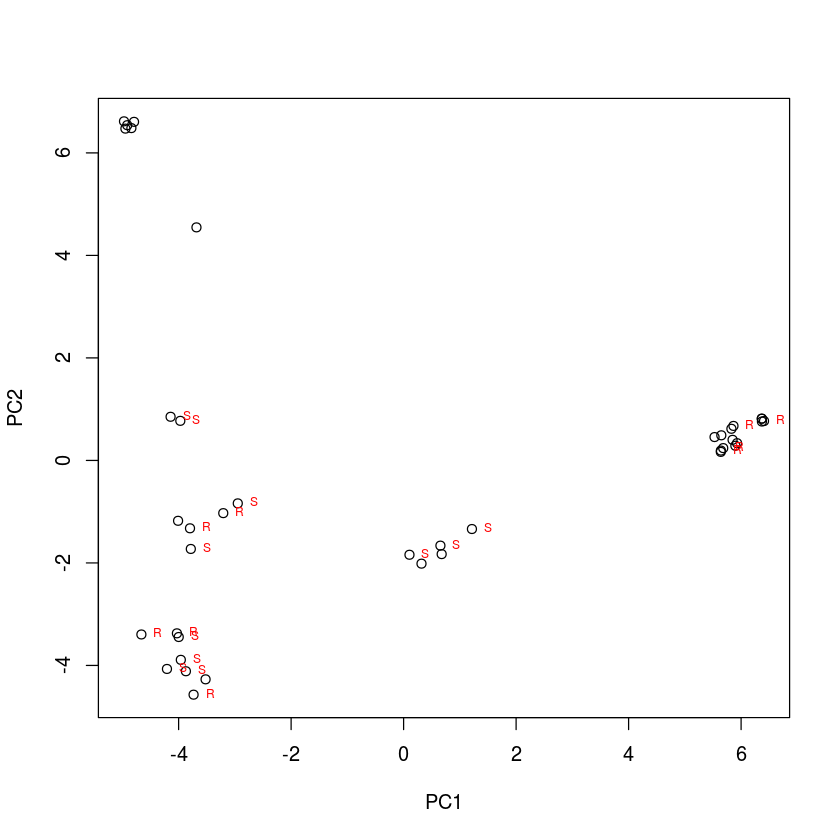

In [124]:
PCA <- prcomp(pan[,3:ncol(pan)])
plot(PCA$x[,1:2])
text(PCA$x[,1], PCA$x[,2], pan[,2], cex=0.6, pos=4, col="red") 